# Bleaching Analysis

This notebook will continue from the simulation notebook. It will take the df/f signal produced and analyse the effects of bleaching of different sources of fluorescence on the signal produced.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [2]:
# import the functions used in the Simulation notebook
from s_functions import simulate_neuron, simulate_nm_conc, simulate_flourescence_signal
from b_factory import bleach_t, bleach_dnm, bleach_nm, bleach_all

# 1. Effect of bleaching on $\Delta F/F$ signal



Recall the formula we used to calculate the observed fluorescence:

$\begin{equation}
F(t) = f_{tissue} + \frac{K_D F_{min} + [NM](t)\ F_{max}}{K_D + [NM](t)}
\end{equation}
$

In this section, we will apply a bleaching factor to the different terms in this fluorescence expression. This will allows us to analyse the effects of bleaching from different contributions of fluorescence.

In [26]:
# now simulate bleaching in the indicator and see how it affects the delta_f signal
def simulate_bleached_f_signal(K_D, tau, F_max, F_min, nm_conc):

    # autofluorescence
    f_tissue = 0.02

    # create timesteps array for the plot
    n_timesteps = nm_conc.size
    t = np.linspace(0,n_timesteps-1,n_timesteps)

    # bleaching factor -- starts off as 1 then exponentially decreases 
    # we set tau to be a very large constant so this is a slow decrease
    bleach = np.exp(-t/tau)

    # calculate bleached f values: derived in part from eq 2 in Neher/Augustine
    f = f_tissue + bleach*(K_D*F_min + nm_conc*F_max)/(K_D + nm_conc)

    # fit a polynmial to f and subtract it from f
    poly = np.polyfit(t,f,5)
    fit = np.polyval(poly,t)
    f = f-fit

    # calculate f0 by getting the median value of the bottom 70% of previous f values
    percentile_mark = np.percentile(f,70)
    f0 = np.absolute(np.median(f[f<percentile_mark]))
    print('f0 value is {}'.format(f0))

    # calculate normalized signal: (assume f0 is the initial f value)
    df = f-f0
    delta_ft_f0 = df/f0


    # plot the normalized signal delta f/f0 at the different t
    plt.figure()
    plt.subplot(2,2,1)
    plt.plot(t,f)
    plt.xlabel('time(ms)')
    plt.ylabel('f')
    plt.title('f vs time')
    

    # plt.plot(t,f0)
    # plt.subplot(2,2,2)
    # plt.xlabel('time(ms)')
    # plt.ylabel('f0')
    # plt.title('df vs time')
    # plt.show()

    plt.plot(t,df)
    plt.subplot(2,2,2)
    plt.xlabel('time(ms)')
    plt.ylabel('df')
    plt.title('df vs time')
    

    plt.plot(t,delta_ft_f0)
    plt.subplot(2,2,3)
    plt.xlabel('time(ms)')
    plt.ylabel('Delta f/f0')
    plt.title('df/f vs time')

    plt.tight_layout()



    # print the bleach factor
    # plt.plot(bleach)
    # plt.xlabel('timesteps(ms)')
    # plt.title('Bleach factor as function of time')

    return delta_ft_f0

In [27]:
# generate the firing neuron
firing_neuron = simulate_neuron(n_timesteps=70000,firing_rate=1)

Simulated neuron with 76 spikes in 70000 timesteps (1 Hz).


In [28]:
# generate the nm_conc arrays
nm_conc, nm_b_conc, nm_r_conc = simulate_nm_conc(firing_neuron,nm_conc0=0,k_b=0.6, k_r=0.4,gamma=0.004)

f0 value is 0.00643580102258845


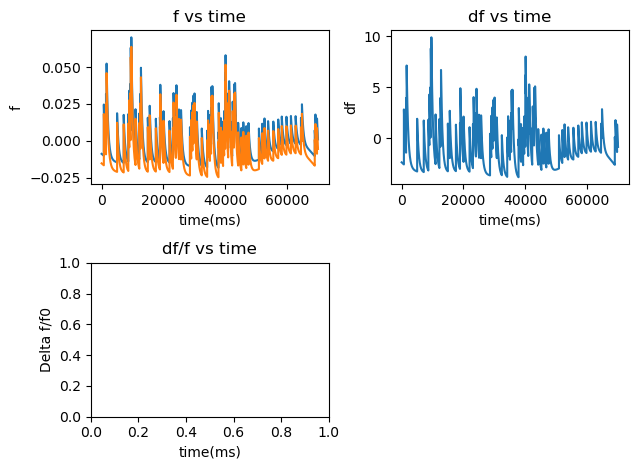

In [31]:
bleached_f_signal = simulate_bleached_f_signal(K_D = 1000, tau=10e4, F_max = 45, F_min = 10, nm_conc=nm_conc)

Now that we've seen that our function works, let us now look at how different 'bleach factors' affect our signal:

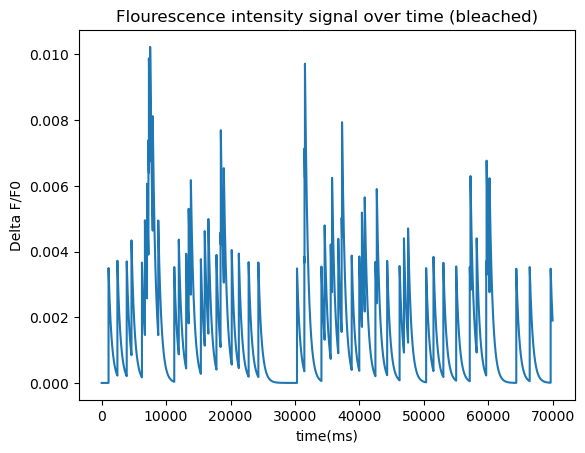

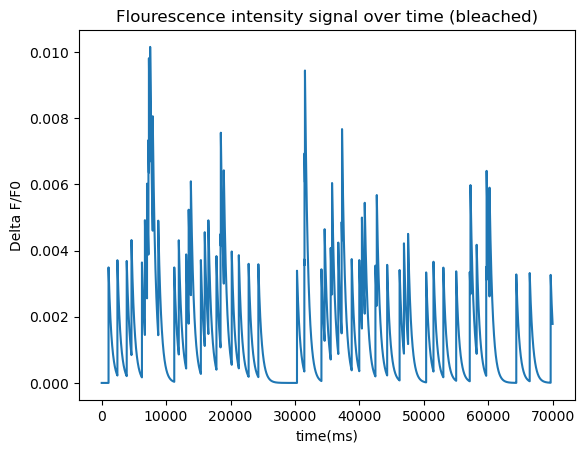

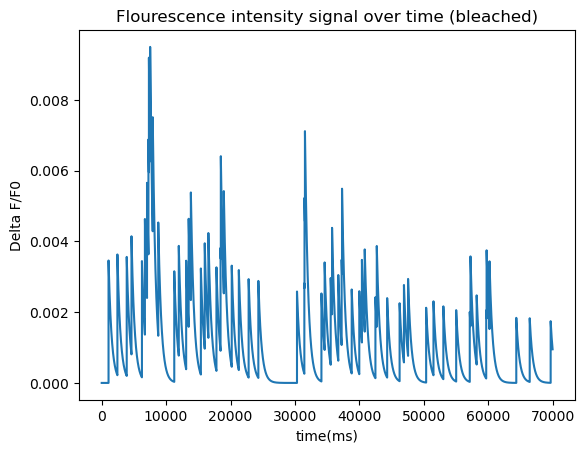

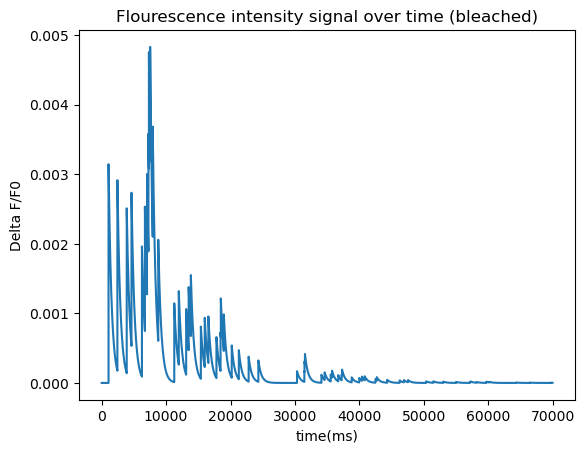

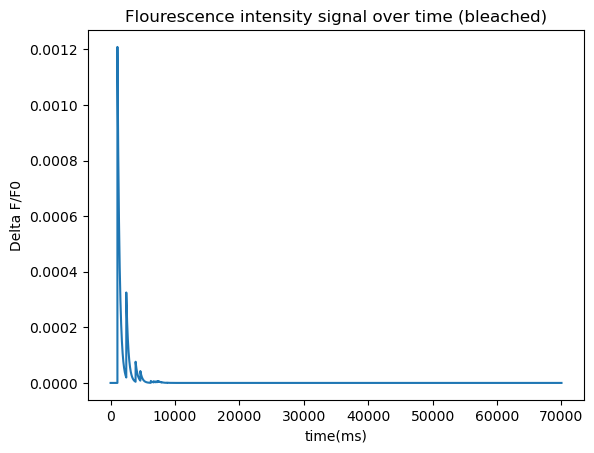

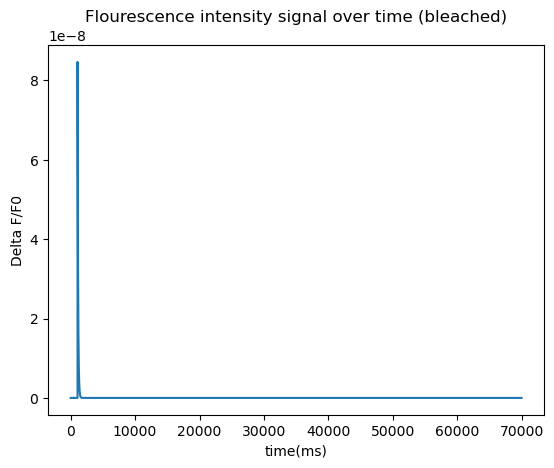

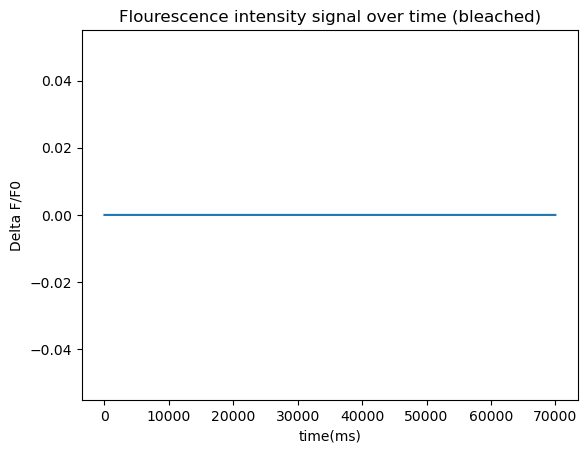

In [ ]:
# check this bleaching effect for different values of tau -- different bleach factor
different_taus = np.array([10e6,10e5,10e4,10e3,10e2,10e1,10e0])


for i in range(len(different_taus)):
    simulate_bleached_f_signal(K_D = 1000, tau=different_taus[i], F_max = 45, F_min = 10, nm_conc=nm_conc_input)

### Checking the effect of different firing rates of the neuron on the delta f/f signal 

Updates coming soon.
The code that will be in this section is currently in the functions.py script